<a href="https://colab.research.google.com/github/Ranjitcnb/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Airbnb_Analysis_Capstone_Project_by_Ranjit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## **Breakdown of this Notebook:**

1.**Importing Libraries**

2.**Loading the dataset**

3.**Data Cleaning:**

*   Dropping duplicates.
*   Cleaning individual columns.
*   Remove the Null values from the dataset
*   Some Transformations

4.**Data Analysis and Visualization:** Using plots to find relations between the features

* What is the average preferred price by customers according to the location?

* Number of active hosts per location (Where most of the hosts focused to own  property?)

* Where the customer pays the highest and lowest rent according to location?

* Most popular/demanded host of Airbnb in New York

* Find the total count of each room type

* Room types and their relation with availability in different neighbourhood groups

* Which are the top 25 most used words in listing names?

* Find top 10 hosts with most listings

* Find the top three hosts based on their turnover

* Find total no. of nights spend per location

* Total no. of nights spends per room types

* Top 10 highest listing neighborhood




**By Ranjit Biswal**

**Answering following Questions:**

What is the average preferred price by customers according to the location?

No. of active host per location (Where most of the host focused to own property)

What is the highest price and lowest price of rent for customer according to location OR which host takes highest rent and lowest rent according to location

Most famous/demanded host of Airbnb in New york

# Importing all requirement libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Connect the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path='/content/drive/MyDrive/assignment5/Airbnb NYC 2019.csv'
air_df=pd.read_csv(file_path)

In [ ]:
#Top Five rows
air_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#all columns
air_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#total size of rows and columns 
air_df.shape


(48895, 16)

In [ ]:
#check the not null values
air_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#describe of object type data in airbnb dataset
air_df.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [ ]:
air_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#requirement columns
air_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# Relationship analysis between different variables

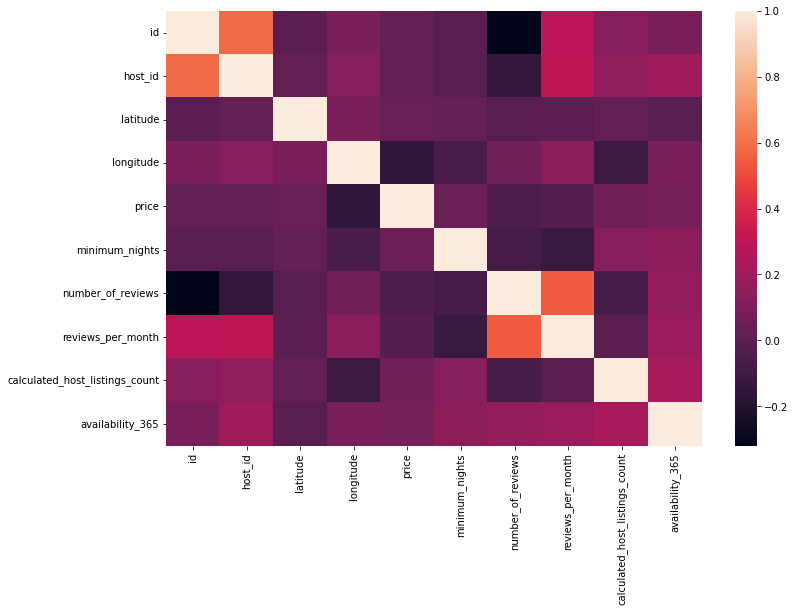

In [ ]:
plt.figure(figsize=(12,8))
corelation = air_df.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=False, linewidths=0)
plt.show()

# 1.What Can We Learn About Different hosts and areas ?


In [ ]:
different_host_area=air_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].count().reset_index()
different_host_area.sort_values('calculated_host_listings_count',ascending=False)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,230
9742,Michael,Manhattan,212
3250,David,Manhattan,202
9741,Michael,Brooklyn,159
...,...,...,...
6352,Jayd,Manhattan,1
6353,Jayden,Manhattan,1
6354,Jayden & Minea,Brooklyn,1
6356,Jaye,Manhattan,1


In [ ]:
areas = air_df.neighbourhood.unique()
areas

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

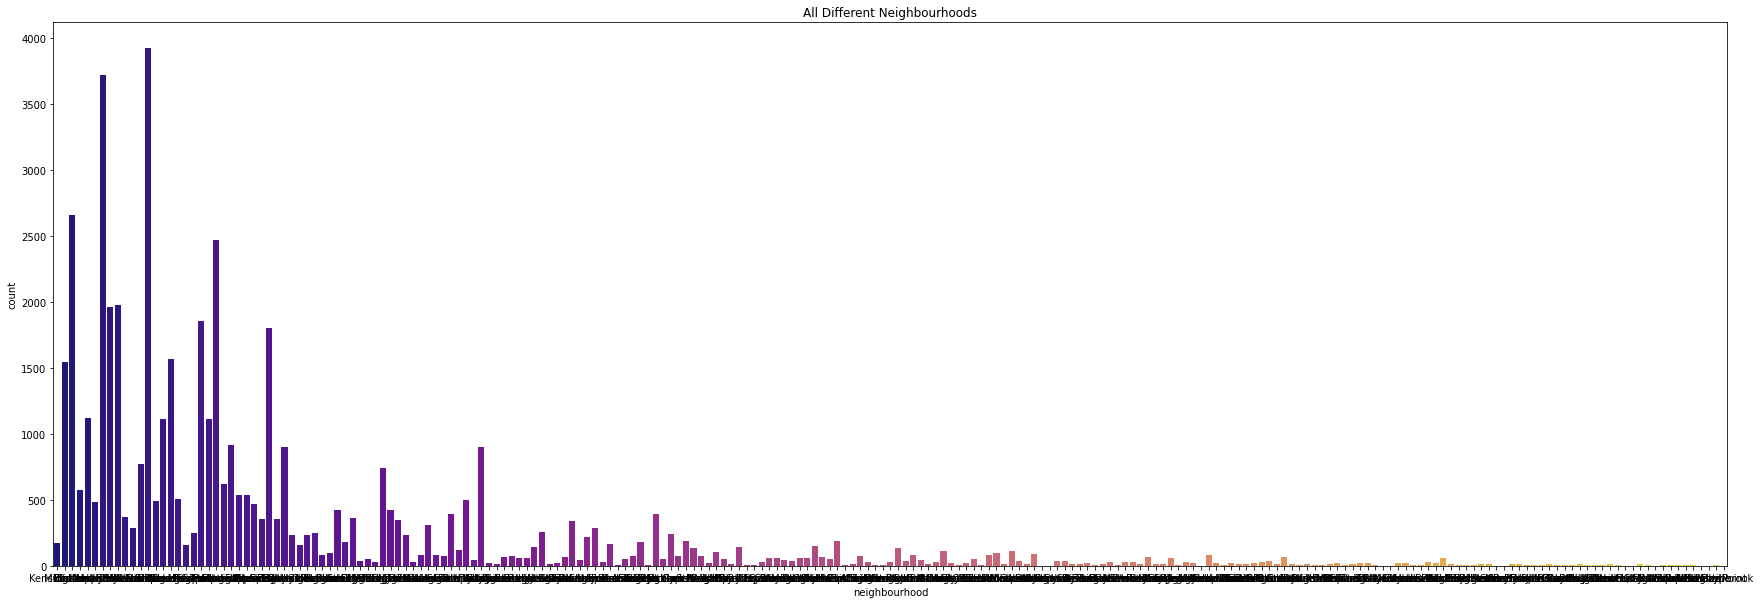

In [ ]:
# all different areas
sns.countplot(x = air_df['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(30, 10)
plt.title('All Different Neighbourhoods')
plt.show()

**2.What can we learn from predictions ?(ex:locations, prices, reviews, etc..)**

In [ ]:
areas_review=air_df.groupby(['name','neighbourhood_group','price','minimum_nights'])['number_of_reviews'].count().reset_index()
sorting_price=areas_review.sort_values('price',ascending=False)

In [ ]:
sorting_price

,name,neighbourhood_group,price,minimum_nights,number_of_reviews
20219,Furnished room in Astoria apartment,Queens,10000,100,1
27223,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,10000,5,1
1112,1-BR Lincoln Center,Manhattan,10000,30,1
2224,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,9999,30,1
36152,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,9999,99,1
...,...,...,...,...,...
17021,Cozy yet spacious private brownstone bedroom,Brooklyn,0,1,1
40501,Spacious comfortable master bedroom with nice ...,Brooklyn,0,1,1
43823,"Sunny, Quiet Room in Greenpoint",Brooklyn,0,2,1
12955,Coliving in Brooklyn! Modern design / Shared room,Brooklyn,0,30,1


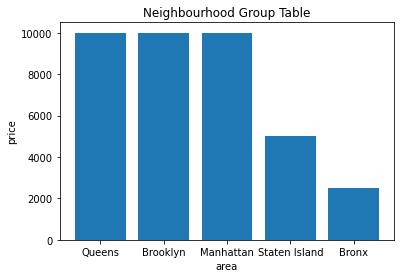

In [ ]:
area=sorting_price['neighbourhood_group']
price=sorting_price['price']

plt.bar(area,price)
plt.rcParams['figure.figsize'] = (10, 7)
plt.title('Neighbourhood Group Table')
plt.xlabel('area')
plt.ylabel('price')
plt.legend
plt.show()

In [ ]:
price_review=sorting_price.sort_values('number_of_reviews',ascending=False).head(150)
price_review

,name,neighbourhood_group,price,minimum_nights,number_of_reviews
22522,Hillside Hotel,Queens,135,1,12
26246,Loft Suite @ The Box House Hotel,Brooklyn,199,3,11
4619,Artsy Private BR in Fort Greene Cumberland,Brooklyn,48,30,10
22523,Hillside Hotel,Queens,165,1,5
23571,IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NAT...,Manhattan,175,30,5
...,...,...,...,...,...
41146,Spotless room w/attached bath. Center of Flushing,Queens,80,1,1
26037,Like your cousin house,Queens,80,1,1
7895,Big exposed brick room in The East Village,Manhattan,80,90,1
38054,"Simple, sweet in NOLITA-NYC",Manhattan,80,3,1


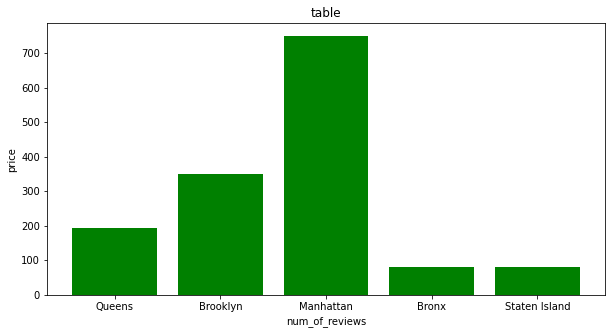

In [ ]:
area=price_review['neighbourhood_group']
review=price_review['price']

plt.rcParams['figure.figsize']=(10,5)
plt.bar(area,review,color='g')
plt.title('table')
plt.xlabel('num_of_reviews')
plt.ylabel('price')
plt.show()

**3.Which hosts are the busiest and why?**

In [ ]:
busiest_host=air_df.groupby(['host_name','neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
valueable_host=busiest_host.sort_values('minimum_nights',ascending=False).head(7)
valueable_host

,host_name,neighbourhood_group,room_type,minimum_nights
16549,Sonder (NYC),Manhattan,Entire home/apt,319
2295,Blueground,Manhattan,Entire home/apt,230
12299,Michael,Manhattan,Entire home/apt,143
9190,Kara,Manhattan,Entire home/apt,129
4128,David,Manhattan,Entire home/apt,117
12438,Mike,Manhattan,Entire home/apt,109
545,Alex,Manhattan,Entire home/apt,98


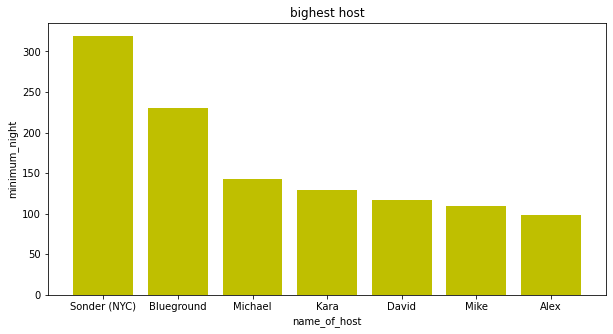

In [ ]:
hosts = valueable_host['host_name']
min_nights = valueable_host['minimum_nights']
plt.bar(hosts,min_nights,color='y')
plt.title('bighest host')
plt.xlabel('name_of_host')
plt.ylabel('minimum_night')
plt.show()

# **The highest hoost are 1.sonder(NYC) 2.Blueground 3.Michael**

**4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [ ]:
different_trafic_areas=air_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
different_trafic_areas.sort_values('minimum_nights',ascending=False)

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


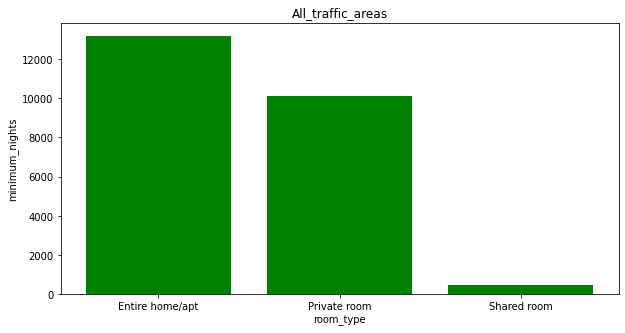

In [ ]:
area=different_trafic_areas['room_type']
night=different_trafic_areas['minimum_nights']

plt.bar(area,night,color='g')
plt.title('All_traffic_areas')
plt.xlabel('room_type')
plt.ylabel('minimum_nights')
plt.show()

**Finding Total count of each room types?**

In [ ]:
air_bnb_roomtype=air_df.room_type.unique()

In [ ]:
air_bnb_roomtype

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
air_bnb_roomtype_frequency=dict(air_df.room_type.value_counts())

In [ ]:
air_bnb_roomtype_frequency

{'Entire home/apt': 25409, 'Private room': 22326, 'Shared room': 1160}

**Room availabel per Neighbourhood Group**

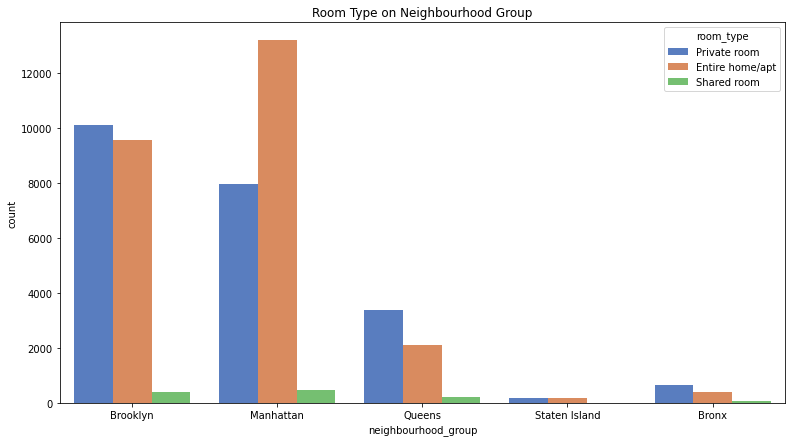

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(x = air_df.neighbourhood_group, hue = air_df.room_type, palette="muted")
plt.show()

**Price on diffrent neighbourhood_group**

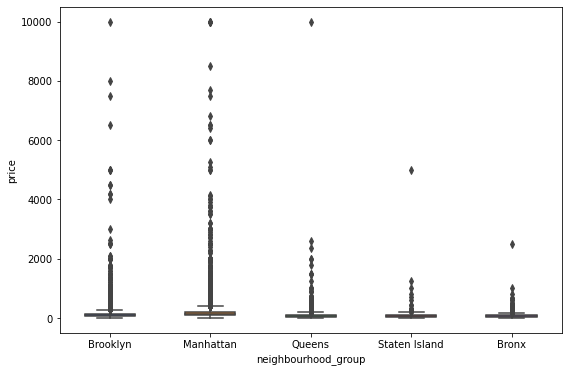

In [ ]:
# price on diffrent neighbourhood_group
plt.figure(figsize=(9,6))
sns.boxplot(data = air_df, x='neighbourhood_group', y='price',palette='bright', width=0.5)
plt.show()

**Rooms availability in different areas**

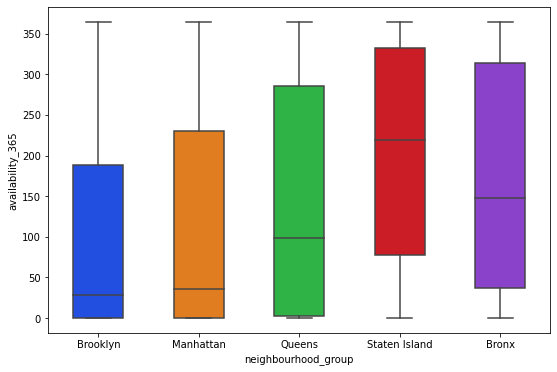

In [ ]:
# rooms availabilty in different areas
plt.figure(figsize=(9, 6))
sns.boxplot(data = air_df, x='neighbourhood_group', y='availability_365',palette='bright', width=0.5)
plt.show()

**The project of analysis the data staying people are Entire home/apt or private which are present in Manhattan,Brooklyn,Queens are in less price**

**Thank you Almabetter gives me this oppertunity to improve my skills.**